### Анализ бизнес-показателей
----------------------

<a id='return_to_the_top'></a>

### Содержание
--------------------------

[1.Импорт и преобразование данных](#import_1)   

* [2.Продукт](#calculations_1)  
  * [2.1 Сколько людей пользуется](#how_much_people_uses) 
  * [2.2 Пользователькие сессии](#user_sessions)
     * [2.2.3 Как часто люди возвращаются](#retentions)
     
* [3.Продажи](#purchases)
  * [3.3  Cредний чек](#average_revenue)
  * [3.4 Расчет LTV](#ltv_calculations) 
     * [Тепловая карта LTV](#ltv_calculations_heatmap)
     
* [4. Маркетинг](#marketing)
  * [4.1 Сколько денег потратили](#total_marketing_investments)
  * [4.2 Стоимость привлечения 1-го покупателя](#costs_per_buyer)
  * [4.3 Расчет ROI (return of investments)](#return_of_investments )
* [5. Выводы](#conclusions)


### 1. Импорт и преобразование данных
<a id='import_1'></a>

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 8.27)})

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
def df_look(df):
    """
    Функция для получения общей информации о датафрейме
    """
    print('Первые 3 строки датафрейма')
    print('-'*52)
    print('{}'.format(df.head(3)))
    print('='*52)
    print('Размер датафрейма: (строк:столбцов) {}'.format(df.shape))
    print('='*52)
    print('Типы данных и общая информация')
    print('-'*52)
    print(df.info())
    print('='*52)
    print('Наличие дубликатов')
    print('='*52)
    print(df.duplicated().sum())
    print('-'*52)
    print('Наличие пропусков')
    print('-'*52)
    print(df.isna().sum())
    print('='*52)


In [3]:
# Импорт данных
orders = pd.read_csv('/datasets/orders_log.csv', sep=',')
costs = pd.read_csv('/datasets/costs.csv', sep=',')
visits = pd.read_csv('/datasets/visits_log.csv', sep=',')

#### 1.1 Заказы
<a id='import_orders'></a>

In [4]:
df_look(orders)

Первые 3 строки датафрейма
----------------------------------------------------
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
Размер датафрейма: (строк:столбцов) (50415, 3)
Типы данных и общая информация
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
Наличие дубликатов
0
----------------------------------------------------
Наличие пропусков
----------------------------------------------------
Buy Ts     0
Revenue    0
Uid        0
dtype: int64


In [5]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

#### 1.2 Затраты

In [6]:
df_look(costs)

Первые 3 строки датафрейма
----------------------------------------------------
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
Размер датафрейма: (строк:столбцов) (2542, 3)
Типы данных и общая информация
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
Наличие дубликатов
0
----------------------------------------------------
Наличие пропусков
----------------------------------------------------
source_id    0
dt           0
costs        0
dtype: int64


In [7]:
costs['dt'] = pd.to_datetime(costs['dt'])

#### 1.3 Визиты

In [8]:
df_look(visits)

Первые 3 строки датафрейма
----------------------------------------------------
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
Размер датафрейма: (строк:столбцов) (359400, 5)
Типы данных и общая информация
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
Наличие дубликатов
0
--------------------------------------

In [9]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [10]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits['end_ts'] = pd.to_datetime(visits['end_ts'],  format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'],  format = '%Y-%m-%d %H:%M:%S')

In [11]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


### 2. Продукт
<a id='calculations_1'></a>


* Продукт  
  * Сколько людей пользуются в день, неделю, месяц?  
  * Сколько сессий в день?  
  * Сколько длится одна сессия?  
  * Как часто люди возвращаются? 

* Uid — уникальный идентификатор пользователя
* Device — категория устройства пользователя
* Start Ts — дата и время начала сессии
* End Ts — дата и время окончания сессии
* Source Id — идентификатор рекламного источника, из которого пришел пользователь

#### 2.1 Сколько людей пользуется
<a id='how_much_people_uses'></a>

In [12]:
# добавляем новые столбцы датами, номерами недель, месяцов, и года (2017-2018)
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.week
visits['session_month'] = visits['start_ts'].dt.month
visits['session_year'] = visits['start_ts'].dt.year


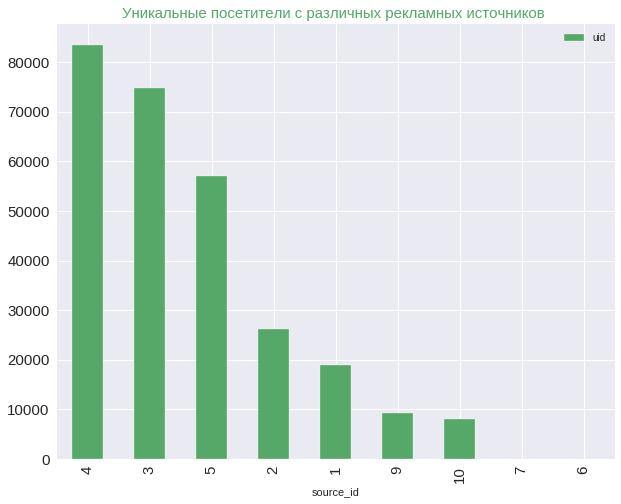

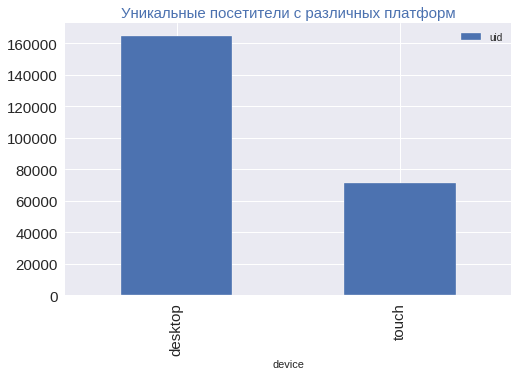

In [13]:
# посмотрим на распределение количества уникальных посетителей с разных источников трафика и устройств
visits_pivot = (visits
                .pivot_table(index=['source_id'], aggfunc={'uid':'nunique'})
                .sort_values(by='uid', ascending=False)
                .plot(kind='bar',figsize=(10, 8), fontsize=15, color='g') 
               )
plt.title('Уникальные посетители с различных рекламных источников ', fontsize=15, color='g')
plt.show()

visits_pivot = (visits
                .pivot_table(index=['device'], aggfunc={'uid':'nunique'})
                .plot(kind='bar',figsize=(8, 5), fontsize=15, color='b')
               )
plt.title('Уникальные посетители с различных платформ', fontsize=15, color='b')
plt.show()

**Вывод**
* Больше всего уников приходит с **4,3,5** рекламного источника
* С настольных компьютеров приходит примерно в 2 раза больше пользователей

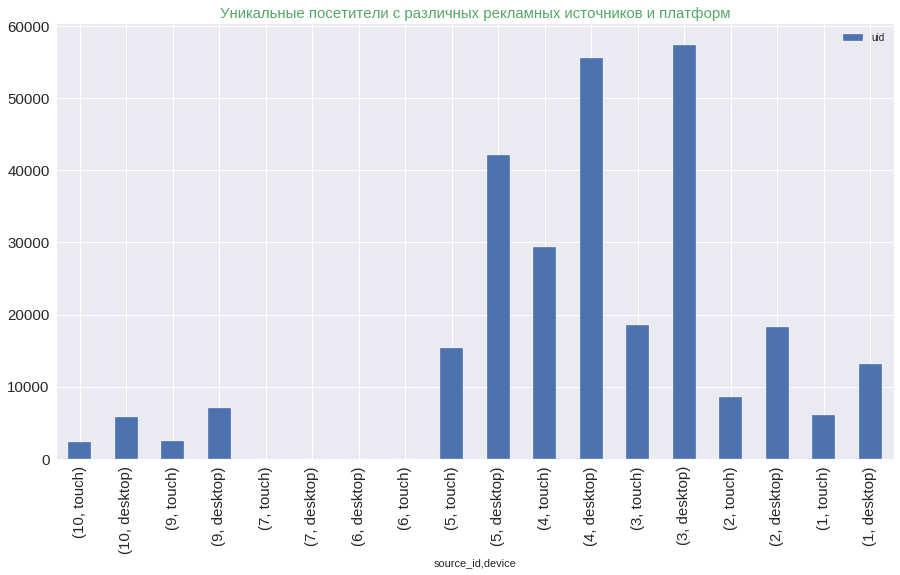

In [14]:
# посмотрим на распределение количества уникальных посетителей с разных источников трафика и устройств
visits_pivot = (visits
                .pivot_table(index=['source_id', 'device'], aggfunc={'uid':'nunique'})
                .sort_values(by='source_id', ascending=False)
                .plot(kind='bar',figsize=(15, 8), fontsize=15) 
               )
plt.title('Уникальные посетители с различных рекламных источников и платформ', fontsize=15, color='g')
plt.show()

 * Картина сохраняется при группировке количества уников по рекламным источникам и устройствам 

In [15]:
source_id_list=pd.unique(visits['source_id']).tolist()
source_id_list=sorted(source_id_list)
source_id_list

[1, 2, 3, 4, 5, 6, 7, 9, 10]

In [16]:
def user_metrics(df, index, color, bins):
    """
    Функция для построения гистограмм распределения 
    дневной (DAU), недельной (WAU), месячной (MAU)
    посещаемости (уникальные посетители) 
    """
    (df
     .query('source_id== @source_id_list')
     .pivot_table(index=index, aggfunc={'uid':'nunique'})
     .plot(kind='hist', bins=bins ,figsize=(10, 5), fontsize=15, color=color)
    )
    plt.ylabel('Частота', fontsize=15)
    plt.xlabel('Количество уникальных посетителей',fontsize=15)
    plt.show()

Распределение уникальных пользователей в день


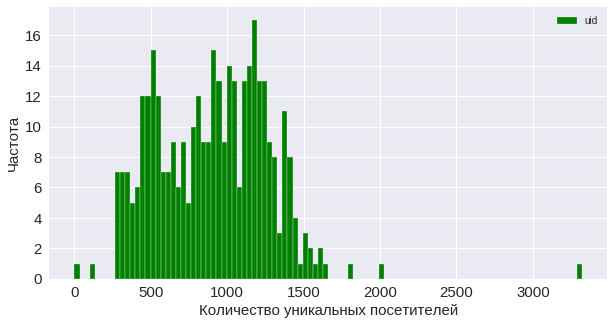

Распределение уникальных пользователей в неделю


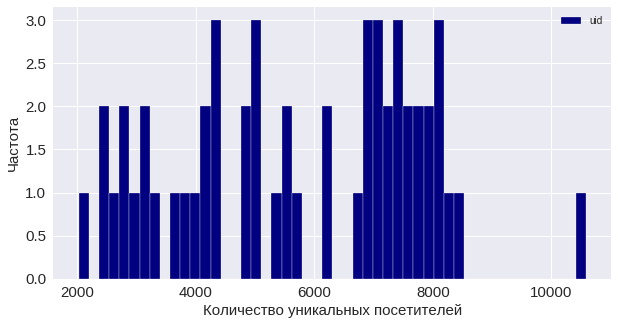

Распределение уникальных пользователей в месяц


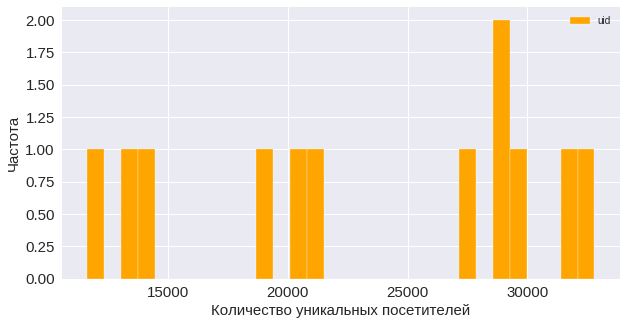

Среднее значение уникальных пользователей в день = 907 (DAU)
Среднее значение уникальных пользователей в неделю = 5716 (WAU)
Среднее значение уникальных пользователей в месяц = 23228 (MAU)


In [17]:
# Расчет DAU
print('='*52)
dau_total=visits.groupby('session_date').agg({'uid':'nunique'}).mean()
print('Распределение уникальных пользователей в день')
user_metrics(visits, ['session_date'], 'green', bins=100)
print('='*52)
# Расчет WAU
wau_total=visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
print('Распределение уникальных пользователей в неделю')
user_metrics(visits, ['session_year', 'session_week'], 'navy', bins=50)
print('='*52)
# Расчет MAU
mau_total=visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
print('Распределение уникальных пользователей в месяц')
user_metrics(visits, ['session_year', 'session_month'], 'orange', bins=30)
print('='*52)

# Вывод средних значений

print('Среднее значение уникальных пользователей в день = {} (DAU)'.format(int(dau_total)))
print('Среднее значение уникальных пользователей в неделю = {} (WAU)'.format(int(wau_total)))
print('Среднее значение уникальных пользователей в месяц = {} (MAU)'.format(int(mau_total)))

print('='*52)

#### 2.2 Пользователькие сессии
<a id='user_sessions'></a>

* Сколько сессий в день?
* Сколько длится одна сессия?
* Как часто люди возвращаются?

##### 2.2.1 Сколько сессий в день?


In [18]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017


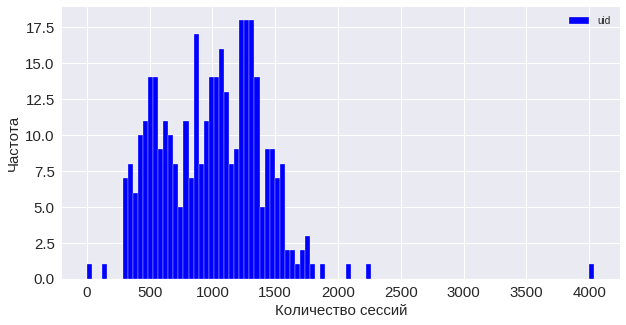

In [19]:
# Посмотрим на распределение количества сессий (одна строка в таблице = одна сессия)
# поэтому посчитаем количество uid (пользователей) в каждую session_date (дату)
(visits
 .groupby('session_date')
 .agg({'uid':'count'})
 .plot(kind='hist', bins=100 ,figsize=(10, 5), fontsize=15, color='blue')
)

plt.ylabel('Частота', fontsize=15)
plt.xlabel('Количество сессий',fontsize=15)
plt.show()

In [20]:
# Рассчитаем количество сессий в день
sessions_per_day_mean = visits.groupby('session_date').agg({'uid':'count'}).mean()[0]
sessions_per_day_median = visits.groupby('session_date').agg({'uid':'count'}).median()[0]

print('Количество сессий в день: {} среднее'.format(int(sessions_per_day_mean)))
print('Количество сессий в день: {} медиана'.format(int(sessions_per_day_median)))


Количество сессий в день: 987 среднее
Количество сессий в день: 1003 медиана


Количество сессий на пользователя: 1.28 среднее


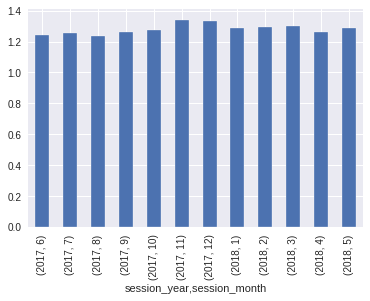

In [21]:
# Посмотрим сколько сессий приходится на одного пользователя
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['session_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user['session_per_user'].plot(kind='bar');

sessions_per_user_mean = sessions_per_user['session_per_user'].mean().round(2)
print('Количество сессий на пользователя: {} среднее'.format(sessions_per_user_mean))

**Вывод**
* Количество сессий на пользователя растет в последние 2 месяца 2017 года (новогодние празники) -- видимо люди выбирают подарки.    
* В 2018 показатель стабилизируется. Но остается достаточно низким как и в 2017 году.    
* Значения DAU (907 уников) и количество сессий в день: 999 (медиана) близки -- мало возвратов пользователей
* Для более точных выводов необходимо определить Retention Rate (удержание пользователей)  


##### 2.2.2  Сколько длится одна сессия?


In [22]:
# Рассчитаем продолжительность каждой сессии в секундах
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
# Посмотрим на распределение продолжительности методом describe() и с помощью гистограммы
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

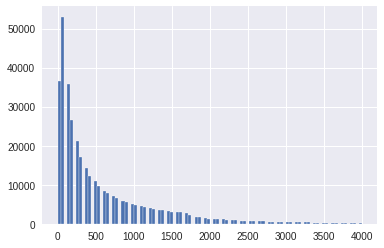

In [23]:
visits['session_duration'].hist(bins=100, range=(0, 4000));

In [24]:
# Посмотрим на максимальное время сессии в часах
visits['session_duration'].max()/3600

23.466666666666665

In [25]:
visits.shape[0]

359400

**Сессия продолжительностью почти сутки это явная аномалия, как и нулевые по продолжительности сессии, удалим нулевые сессии и те, что больше 3-х часов, вряд-ли так долго выбирают концерт или спектакль**

In [26]:
# Перед удалением рассчитаем наиболее распростаненное значение продолжительности сессии - "моду"
visits['session_duration'].mode()

0    60
dtype: int64

In [27]:
visits.drop(visits.query('session_duration <=0 or session_duration >= 3600*3').index, inplace=True)
visits.shape[0]

323344

Удалено: **36056** строк

In [28]:
# Рассчитаем моду после удаления
visits['session_duration'].mode()

0    60
dtype: int64

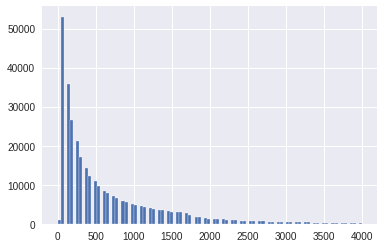

In [29]:
visits['session_duration'].hist(bins=100, range=(0, 4000));

**Мода после удаления выбросов не изменилась.    
Таким образом, ASL (average session length) составляет 60 секунд.**

##### 2.2.3  Как часто люди возвращаются?
<a id='retentions'></a>

Разделим пользователей на когорты

In [30]:
#  предварительно сохраним датафрейм visits в текущем виде в новую переменную visits_new
visits_new = visits

In [31]:
visits.head(3)

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440


In [32]:
# Когорты будем формировать по дате первой активности
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')


Рассчитаем lifetime когорты по месяцам
* Возьмем текущую дату (start_ts) из visits и посчитаем в какой день начался месяц в этой дате 

In [33]:
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['cohort_lifetime'] = (visits['activity_month'] - visits['first_activity_month'])/np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype('int')

In [34]:
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# переименуем столбец "uid" в "user_count" -- так как мы нашли количество
# активных пользователей на каждый период жизни когорты "cohort_lifetime" ("пользователи которые активны 'сейчас' ")
# а также это необходимо для дальнейшего объединения -- чтобы не было одинаковых названий столбцов
cohorts = cohorts.rename(columns={'uid':'user_count'})

In [35]:
cohorts.head()

,first_activity_month,cohort_lifetime,user_count
0,2017-06-01,0,11884
1,2017-06-01,2,606
2,2017-06-01,3,710
3,2017-06-01,4,777
4,2017-06-01,5,802


In [36]:
# Тут отделяем количество пользователей, которое было изначально (в нулевой лайфтайм)
initial_users_count = cohorts.query('cohort_lifetime==0')[['first_activity_month', 'user_count']]
initial_users_count = initial_users_count.rename(columns={'user_count':'user_count_initial'})
initial_users_count.head(3)

,first_activity_month,user_count_initial
0,2017-06-01,11884
10,2017-07-01,11824
19,2017-08-01,9214


In [37]:
# присоединим к "cohorts" "initial_users_count" с помощью merge() по полю "first_activity_month"
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts

,first_activity_month,cohort_lifetime,user_count,user_count_initial
0,2017-06-01,0,11884,11884
1,2017-06-01,2,606,11884
2,2017-06-01,3,710,11884
3,2017-06-01,4,777,11884
4,2017-06-01,5,802,11884
...,...,...,...,...
58,2018-03-01,0,18792,18792
59,2018-03-01,1,766,18792
60,2018-03-01,2,479,18792
61,2018-04-01,0,14214,14214


In [38]:
# добавим столбец retention_rate
cohorts['retention_rate'] = cohorts['user_count'] / cohorts['user_count_initial']

In [39]:
cohorts.head()

,first_activity_month,cohort_lifetime,user_count,user_count_initial,retention_rate
0,2017-06-01,0,11884,11884,1.000000
1,2017-06-01,2,606,11884,0.050993
2,2017-06-01,3,710,11884,0.059744
3,2017-06-01,4,777,11884,0.065382
4,2017-06-01,5,802,11884,0.067486


In [40]:
# строим сводную таблицу Retention Rate
retention_rate_pivot = (cohorts
                        .pivot_table(index='first_activity_month', 
                                     columns='cohort_lifetime', 
                                     values='retention_rate',
                                     aggfunc='sum')
                                    
                       )


In [41]:
retention_rate_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10
first_activity_month,,,,,,,,,,,
2017-06-01,1.0,,0.0509929,0.0597442,0.065382,0.0674857,0.0577247,0.0561259,0.0818748,0.0381185,0.0439246
2017-07-01,1.0,0.0545501,0.050406,0.0556495,0.0565798,0.0465156,0.0440629,0.0712111,,0.0473613,
2017-08-01,1.0,0.0744519,0.0604515,0.0604515,0.0479705,0.0414586,0.0642501,0.0271326,0.024745,,
2017-09-01,1.0,,0.10076,,0.0380826,0.0649256,0.022876,0.0227438,,,
2017-10-01,1.0,0.078129,0.0508115,0.0377687,0.057524,0.0207749,0.0197553,,,,
2017-11-01,1.0,,0.0426979,0.0636645,0.0217313,0.0206045,,,,,
2017-12-01,1.0,0.0547112,0.0603126,0.0194529,0.017716,,,,,,
2018-01-01,1.0,0.0872102,0.0243547,0.0192504,,,,,,,
2018-02-01,1.0,0.0242899,0.0191841,,,,,,,,


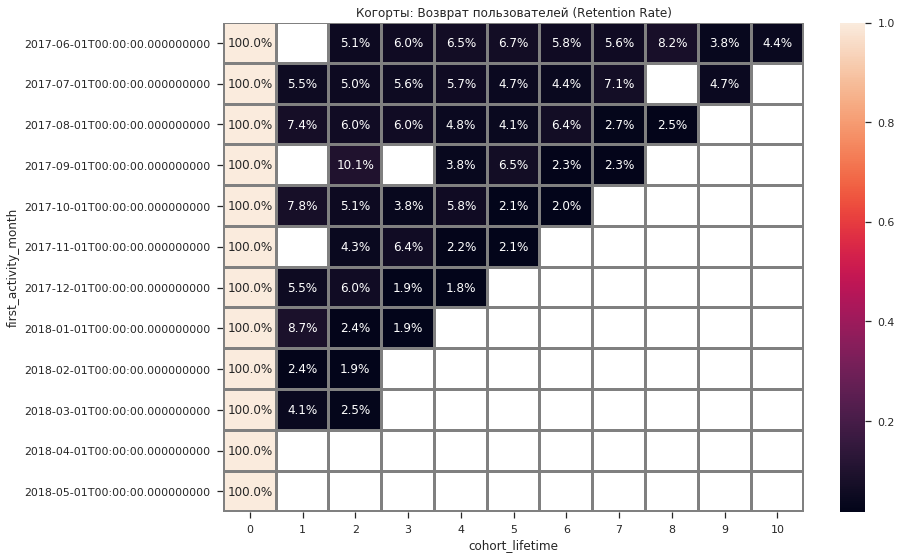

In [42]:
sns.set(style='ticks')
plt.figure(figsize=(13, 9))
plt.title('Когорты: Возврат пользователей (Retention Rate)')
sns.heatmap(retention_rate_pivot, annot=True, fmt='.1%', linewidths=2, linecolor='gray');

**Вывод**
* Возврат пользователей (Retention Rate) совсем небольшой (4-7 %), с редким повышением возвратов в конце и начале года. 
* Это потенциальная точка роста, процент возврата нужно повышать

### 3. Продажи
<a id='purchases'></a>


* Когда люди начинают покупать?
* Сколько раз покупают за период?
* Какой средний чек?
* Сколько денег приносят? (LTV)

##### 3.1 Когда  начинают покупать

In [43]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [44]:
# находим минимальное время первой покупки
first_orders_time = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_orders_time.columns = ['uid', 'first_purchase']
first_orders_time.shape

(36523, 2)

In [45]:
first_visit_date = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visit_date.columns = ['uid', 'first_visit_date']
first_visit_date.shape

(207042, 2)

In [46]:
# Нам нужно сохранить только тех кто покупал поэтому выполним объединение с параметром "how='inner'"
from_visit_to_order = first_orders_time.merge(first_visit_date, on='uid', how='inner')

In [47]:
from_visit_to_order.head()

,uid,first_purchase,first_visit_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [48]:
# Считаем сколько времени проходит от первого визита до покупки
from_visit_to_order['delta_seconds'] = (from_visit_to_order['first_purchase']\
                                        - from_visit_to_order['first_visit_date']).dt.seconds

In [49]:
from_visit_to_order['delta_minutes'] = from_visit_to_order['delta_seconds']/60

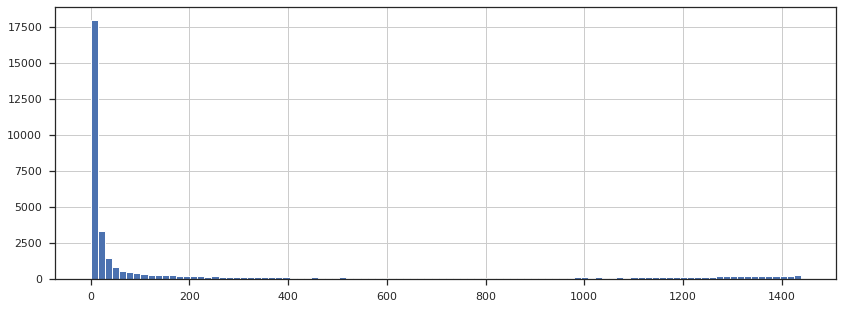

In [50]:
# Строим гистограмму распределения времени от первого захода на сайт до покупки
from_visit_to_order['delta_minutes'].hist(bins=100, figsize=(14,5));

Распределение не нормальное, поэтому будем использовать моду

In [51]:
from_visit_to_order['delta_minutes'].mode()

0    1.0
dtype: float64

**Вывод**: характерное время от первого захода на сайт до первой покупки -- 1 минута

##### 3.2  Сколько раз покупают за период

In [52]:
orders['buy_ts'].isna().sum()

0

In [53]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [54]:
purchases = orders.groupby('uid').agg({'buy_ts':'count'}).reset_index()
purchases = purchases.rename(columns={'buy_ts':'purchases_per_user'})
purchases.shape

(36523, 2)

In [55]:
purchases = purchases.query('purchases_per_user>0')
purchases.shape

(36523, 2)

In [56]:
purchases.head()

,uid,purchases_per_user
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2


In [57]:
purchases_count = orders.merge(purchases, on='uid', how='inner')
purchases_count['week'] = purchases_count['buy_ts'].dt.week
purchases_count['year'] = purchases_count['buy_ts'].dt.year
purchases_count.shape

(50415, 6)

In [58]:
purchases_count.head()

,buy_ts,revenue,uid,purchases_per_user,week,year
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,22,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,22,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,1,22,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,1,22,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,1,22,2017


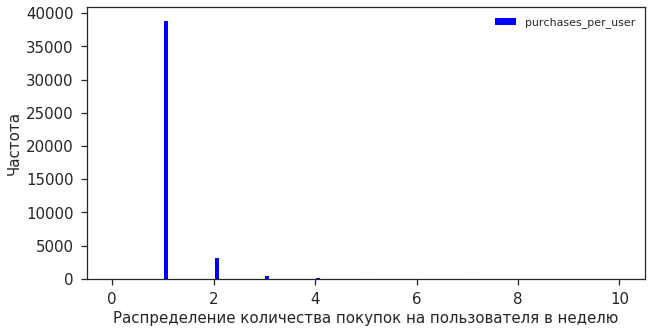

In [59]:
(purchases_count
     .groupby(['week','year', 'uid'])
     .agg({'purchases_per_user':'count'})
     .plot(kind='hist', bins=100, range=(0, 10) ,figsize=(10, 5), fontsize=15, color='blue')
)
plt.ylabel('Частота', fontsize=15)
plt.xlabel('Распределение количества покупок на пользователя в неделю', fontsize=15)
plt.show()


In [60]:
purchases_count['purchases_per_user'].mode()

0    1
dtype: int64

##### 3.3  Cредний чек
<a id='average_revenue'></a>

In [61]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [62]:
first_order = orders.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order'
orders_new = orders.join(first_order, on='uid')


In [63]:
orders_new['first_order_month'] = orders_new['first_order'].astype('datetime64[M]')
orders_new['order_month'] = orders_new['buy_ts'].astype('datetime64[M]')


In [64]:
average_order_value = ((orders_new['revenue'].sum())/(orders_new['uid'].count())).round(3)
print(f'Средний чек за весь период исследования = {average_order_value} условных единиц')

Средний чек за весь период исследования = 5.0 условных единиц


In [65]:
# не считаем на уникальных пользователей (берем ('uid':'count')), так как 
# средний чек считается на все транзакции, а не только на уникальные
orders_new_grouped_by_cohorts = (orders_new
                                 .groupby(['first_order_month', 'order_month'])
                                 .agg({'revenue':'sum', 'uid':'count'}))

In [66]:
orders_new_grouped_by_cohorts['average_revenue'] = \
orders_new_grouped_by_cohorts['revenue'] / orders_new_grouped_by_cohorts['uid']

In [67]:
orders_new_grouped_by_cohorts = orders_new_grouped_by_cohorts.reset_index()
orders_new_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,average_revenue
0,2017-06-01,2017-06-01,9557.49,2354,4.060106
1,2017-06-01,2017-07-01,981.82,177,5.547006
2,2017-06-01,2017-08-01,885.34,174,5.088161
3,2017-06-01,2017-09-01,1931.30,226,8.545575
4,2017-06-01,2017-10-01,2068.58,292,7.084178


In [68]:
orders_new_grouped_by_cohorts['lifetime'] = ((orders_new_grouped_by_cohorts['order_month'] - \
                           orders_new_grouped_by_cohorts['first_order_month'])/np.timedelta64(1, 'M')).round().astype('int')
orders_new_grouped_by_cohorts['first_order_month'] = orders_new_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

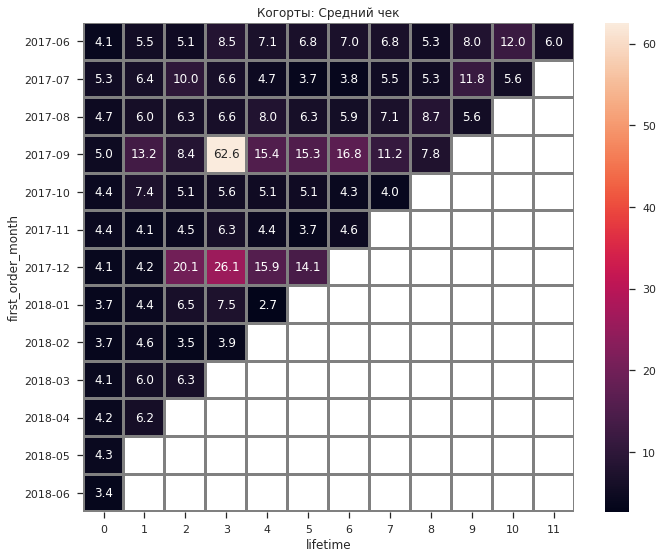

In [69]:
average_revenue_pivot = (orders_new_grouped_by_cohorts
                         .pivot_table(index='first_order_month', columns='lifetime',
                                      values='average_revenue', aggfunc='mean'
                         )
)
 
# Стоим тепловую карту 
sns.set(style='ticks')
plt.figure(figsize=(11, 9))
plt.title('Когорты: Средний чек')
sns.heatmap(average_revenue_pivot, annot=True, fmt='.1f', linewidths=2, linecolor='gray');

**Вывод**
* Чаще всего от момента появления на сайте до первой покупки проходит 1 минута, и как правило, совершается одна покупка
* Лучшие результаты по среднему чеку показывают следующие когорты(по месяцу первого заказа): сентябрь-2017 и декабрь-2017

#### 3.4 Расчет LTV 
<a id='ltv_calculations'></a>

In [70]:
visits_new.head(3)

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440


In [71]:
# Сгруппируем по 'uid' найтем минимальную дату появления на сайте, ее будем считать датой привлечения пользователя
df_all = visits_new.groupby('uid').agg({'start_ts':'min'})
# переименуем полученную минимальную дату в 'start_date'
df_all = df_all.rename(columns={'start_ts':'start_date'})
# установим в качестве индекса столбец 'uid' и присоединим к таблице 'visits_new'
df_all = visits_new.set_index('uid').join(df_all)


In [72]:
df_all.head()

,device,end_ts,source_id,start_ts,session_date,session_week,session_month,session_year,session_duration,start_date
uid,,,,,,,,,,
9223535092787691177,touch,2017-11-14 20:19:00,4,2017-11-14 20:00:00,2017-11-14,46,11,2017,1140,2017-11-14 08:54:00
9223535092787691177,touch,2017-11-14 09:22:00,1,2017-11-14 08:54:00,2017-11-14,46,11,2017,1680,2017-11-14 08:54:00
9223535092787691177,touch,2017-11-14 11:04:00,4,2017-11-14 10:30:00,2017-11-14,46,11,2017,2040,2017-11-14 08:54:00
9223696655126052404,touch,2017-11-05 17:12:00,3,2017-11-05 17:08:00,2017-11-05,44,11,2017,240,2017-11-05 17:08:00
9223707061355654945,touch,2017-11-01 00:40:00,9,2017-10-31 22:36:00,2017-10-31,44,10,2017,7440,2017-10-31 22:36:00


In [73]:
# Оставим только те строки, в которых дата начала: 'start_ts'=='start_date'
# выделим столбцы с датой привлечения: 'start_date'
# устройством 'device'
# рекламным источником 'source_id'
df_all = df_all.query('start_ts==start_date')[['start_date', 'source_id', 'device']]

In [74]:
df_all.head()

,start_date,source_id,device
uid,,,
9223535092787691177,2017-11-14 08:54:00,1,touch
9223696655126052404,2017-11-05 17:08:00,3,touch
9223707061355654945,2017-10-31 22:36:00,9,touch
9223717650969886679,2017-11-04 14:02:00,4,desktop
9223728001958725072,2017-10-18 15:28:00,4,desktop


In [75]:
# выделим месяц начала
df_all['start_month'] = df_all['start_date'].astype('datetime64[M]')
df_all['dt'] = df_all['start_date'].dt.date
df_all['dt'] = pd.to_datetime(df_all['dt'])

In [76]:
costs.head(1)

,source_id,dt,costs
0,1,2017-06-01,75.2


In [77]:
# переименуем 'start_month' в 'dt' также как в датафрейме 'costs',
# чтобы затем объединить по 'source_id' и 'dt'
#df_all = df_all.rename(columns={'start_month':'dt'})

In [78]:
df_all.head()

,start_date,source_id,device,start_month,dt
uid,,,,,
9223535092787691177,2017-11-14 08:54:00,1,touch,2017-11-01,2017-11-14
9223696655126052404,2017-11-05 17:08:00,3,touch,2017-11-01,2017-11-05
9223707061355654945,2017-10-31 22:36:00,9,touch,2017-10-01,2017-10-31
9223717650969886679,2017-11-04 14:02:00,4,desktop,2017-11-01,2017-11-04
9223728001958725072,2017-10-18 15:28:00,4,desktop,2017-10-01,2017-10-18


In [79]:
# изменим индексы в 'df_all' и 'costs'
df_all = (df_all
          .reset_index()
          .set_index(['source_id','dt']))

costs_new = costs.set_index(['source_id','dt'])

In [80]:
df_all.head()

uid          start_date   device  \
source_id dt                                                             
1         2017-11-14  9223535092787691177 2017-11-14 08:54:00    touch   
3         2017-11-05  9223696655126052404 2017-11-05 17:08:00    touch   
9         2017-10-31  9223707061355654945 2017-10-31 22:36:00    touch   
4         2017-11-04  9223717650969886679 2017-11-04 14:02:00  desktop   
          2017-10-18  9223728001958725072 2017-10-18 15:28:00  desktop   

                     start_month  
source_id dt                      
1         2017-11-14  2017-11-01  
3         2017-11-05  2017-11-01  
9         2017-10-31  2017-10-01  
4         2017-11-04  2017-11-01  
          2017-10-18  2017-10-01

In [81]:
costs_new.head()

costs
source_id dt               
1         2017-06-01  75.20
          2017-06-02  62.25
          2017-06-03  36.53
          2017-06-04  55.00
          2017-06-05  57.08

In [82]:
df_all = df_all.join(costs_new, how='left')
#df_all_left = df_all.join(costs_new, how='left')

In [83]:
df_all.head()

uid          start_date   device  \
source_id dt                                                              
1         2017-06-01   9714640286797951674 2017-06-01 21:45:00  desktop   
          2017-06-01   9909415513333099415 2017-06-01 13:24:00    touch   
          2017-06-01  10329302124590727494 2017-06-01 00:09:00  desktop   
          2017-06-01  10349500346348845391 2017-06-01 19:55:00  desktop   
          2017-06-01  10534330097262531592 2017-06-01 22:55:00  desktop   

                     start_month  costs  
source_id dt                             
1         2017-06-01  2017-06-01   75.2  
          2017-06-01  2017-06-01   75.2  
          2017-06-01  2017-06-01   75.2  
          2017-06-01  2017-06-01   75.2  
          2017-06-01  2017-06-01   75.2

In [84]:
df_all_temp = (df_all
               .reset_index()
               .groupby(['source_id', 'dt'])
               .agg({'device':'count','costs':'max'})
              )

In [85]:
df_all_temp.reset_index()
df_all_temp = df_all_temp.rename(columns={'device':'user_count'})
# считаем САС (customer acquisition cost - стоимость привлечения клиента)
df_all_temp['cac'] = df_all_temp['costs'] / df_all_temp['user_count']

In [86]:
df_all_temp.head()

user_count  costs       cac
source_id dt                                     
1         2017-06-01          45  75.20  1.671111
          2017-06-02          28  62.25  2.223214
          2017-06-03          22  36.53  1.660455
          2017-06-04          22  55.00  2.500000
          2017-06-05          36  57.08  1.585556

In [87]:
df_all = (df_all
          .join(df_all_temp[['user_count', 'cac']], how='left')
          .reset_index()
         )

In [88]:
df_all.head()

,source_id,dt,uid,start_date,device,start_month,costs,user_count,cac
0,1,2017-06-01,9714640286797951674,2017-06-01 21:45:00,desktop,2017-06-01,75.2,45,1.671111
1,1,2017-06-01,9909415513333099415,2017-06-01 13:24:00,touch,2017-06-01,75.2,45,1.671111
2,1,2017-06-01,10329302124590727494,2017-06-01 00:09:00,desktop,2017-06-01,75.2,45,1.671111
3,1,2017-06-01,10349500346348845391,2017-06-01 19:55:00,desktop,2017-06-01,75.2,45,1.671111
4,1,2017-06-01,10534330097262531592,2017-06-01 22:55:00,desktop,2017-06-01,75.2,45,1.671111


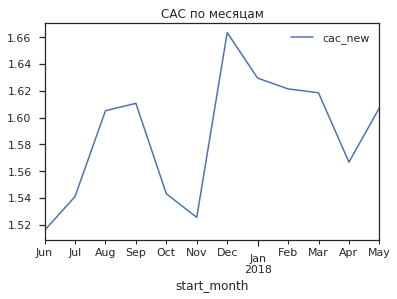

In [89]:
# посмотрим как изменяется стоимость привлечения пользователя по месяцам
cac_cohorts = (df_all
               .groupby(['start_month']).agg({'uid':'count','cac':'sum'})
               .rename(columns={'uid':'cohort_size'})
              )
cac_cohorts['cac_new'] = cac_cohorts['cac']/cac_cohorts['cohort_size']
ax=cac_cohorts[['cac_new']].plot()
ax.set(title='CAC по месяцам');

In [90]:
orders_new.head(3)

,buy_ts,revenue,uid,first_order,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01


In [91]:
orders_new = orders_new.set_index('uid')
df_all = df_all.set_index('uid')

In [92]:
df_ltv = orders_new.join(df_all, how='left')[['start_month', 'first_order_month', 'revenue']]

df_ltv.head()


,start_month,first_order_month,revenue
uid,,,
9223707061355654945,2017-10-01,2017-10-01,4.64
9224005701666002943,2017-12-01,2017-12-01,3.36
9224005701666002943,2017-12-01,2017-12-01,3.67
9225406053864431006,2017-09-01,2017-12-01,0.43
9225479525411867039,2018-02-01,2018-02-01,7.33


In [93]:
df_ltv['lifetime'] = (df_ltv['first_order_month'] - df_ltv['start_month'])/np.timedelta64(1,'M')


In [94]:
# изначальное количество строк
df_ltv.shape[0]

50415

In [95]:
# срез, где все лайфтаймы строго больше нуля
df_ltv.query('lifetime>0').shape[0]

9134

In [96]:
# срез, где все лайфтаймы равны нулю
df_ltv.query('lifetime==0').shape[0]

40656

In [97]:
# срез, где все лайфтаймы строго меньше нуля
df_ltv.query('lifetime<0').shape[0]

148

In [98]:
# оставляем "нулевые" лайфтаймы и те что больше нуля 
df_ltv = df_ltv.query('lifetime >= 0')
df_ltv.shape[0]

49790

In [99]:
df_ltv.isna().sum()

start_month          0
first_order_month    0
revenue              0
lifetime             0
dtype: int64

In [100]:
df_ltv['lifetime'] = df_ltv['lifetime'].round().astype('int')

In [101]:
df_ltv['start_month'] = df_ltv['start_month'].dt.strftime('%Y-%m')

In [102]:
df_ltv = df_ltv.groupby(['start_month', 'lifetime']).agg({'revenue':'sum'})
df_ltv_pivot = (df_ltv
                .pivot_table(index='start_month', columns='lifetime',
                            values='revenue', aggfunc='sum')
               
               )
df_ltv_pivot = df_ltv_pivot.cumsum(axis=1)

In [103]:
df_ltv_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
start_month,,,,,,,,,,,,
2017-06,23790.21,27887.64,28552,32758.3,33781.6,35832.1,36360.3,37416.8,37677.3,37921.9,38080.9,38274.2
2017-07,11880.27,13365.79,14654.6,15705.5,16307.6,16741.3,17091,17440.6,17739.8,17906.6,18020.3,
2017-08,9366.67,10086.90,10568.3,11025.1,11292.8,11465,11641.8,12952.6,13076.6,13211.4,,
2017-09,28166.04,30438.00,31601.2,32074.3,32332.2,32645.2,32913,33082.5,33224.4,,,
2017-10,22451.23,24747.33,25504.6,26048.4,26479.9,26884.5,27055.6,27228.9,,,,
2017-11,19354.17,21960.51,22568,23020.9,23596.1,24027.6,24315.7,,,,,
2017-12,28105.29,29245.63,29778.5,30570.3,30789.3,31015.6,,,,,,
2018-01,12355.81,13421.28,13850.9,14001.3,14390.4,,,,,,,
2018-02,12706.80,14185.91,14642.4,15368.6,,,,,,,,


**Тепловая карта LTV**
<a id='ltv_calculations_heatmap'></a>

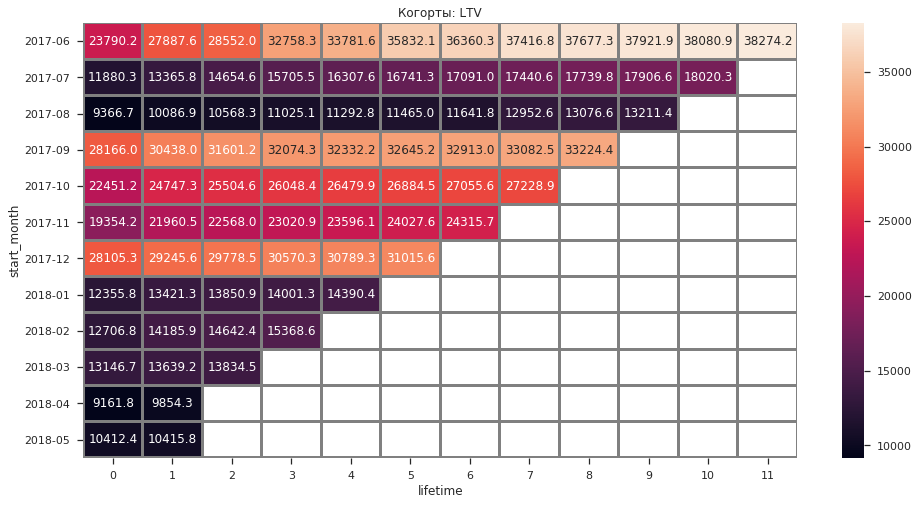

In [104]:
# Строим тепловую карту для LTV по когортам
sns.set(style='ticks')
plt.figure(figsize=(16, 8))
plt.title('Когорты: LTV')
sns.heatmap(df_ltv_pivot, annot=True, fmt='.1f', linewidths=2, linecolor='gray');

**Вывод**
* Лучшие когорты по значению LTV (принесли больше всего денег):
  * июнь-2017
  * сентябрь-2017
  * октябрь-2017
  * декабрь-2017
  
  

### 4. Маркетинг
  * Сколько денег потратили? Всего / на каждый источник / по времени
  * Сколько стоило привлечение одного покупателя из каждого источника?
  * На сколько окупились расходы? (ROI)
<a id='marketing'></a>

#### 4.1 Сколько денег потратили
<a id='total_marketing_investments'></a>

In [105]:
costs_new.head(2)

costs
source_id dt               
1         2017-06-01  75.20
          2017-06-02  62.25

In [106]:
costs_all = costs['costs'].sum()
print(f'Суммарные затраты на маркетинг = {costs_all} у.е')

Суммарные затраты на маркетинг = 329131.62 у.е


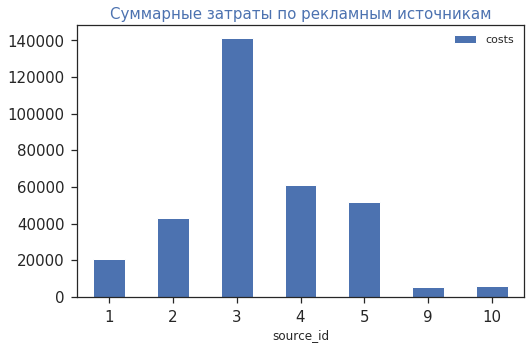

In [107]:
costs_pivot_source = (costs
               .pivot_table(index='source_id', values='costs', aggfunc='sum')
               .sort_values(by='source_id', ascending=True)
               .plot(kind='bar',figsize=(8, 5), fontsize=15, rot=0)
              )
plt.title('Суммарные затраты по рекламным источникам', fontsize=15, color='b')
plt.show()

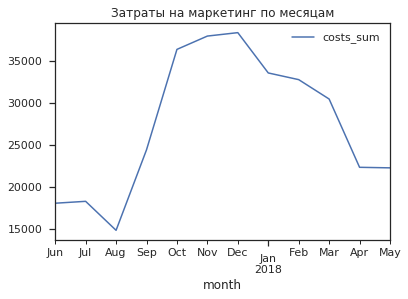

In [108]:
costs_period = costs
costs_period['month'] = costs['dt'].astype('datetime64[M]')
costs_period = (costs_period
                .groupby('month').agg({'costs':'sum'})
                .rename(columns={'costs':'costs_sum'})
               )

ax=costs_period[['costs_sum']].plot()
ax.set(title='Затраты на маркетинг по месяцам');

In [109]:
df_all.head()

,source_id,dt,start_date,device,start_month,costs,user_count,cac
uid,,,,,,,,
9714640286797951674,1,2017-06-01,2017-06-01 21:45:00,desktop,2017-06-01,75.2,45,1.671111
9909415513333099415,1,2017-06-01,2017-06-01 13:24:00,touch,2017-06-01,75.2,45,1.671111
10329302124590727494,1,2017-06-01,2017-06-01 00:09:00,desktop,2017-06-01,75.2,45,1.671111
10349500346348845391,1,2017-06-01,2017-06-01 19:55:00,desktop,2017-06-01,75.2,45,1.671111
10534330097262531592,1,2017-06-01,2017-06-01 22:55:00,desktop,2017-06-01,75.2,45,1.671111


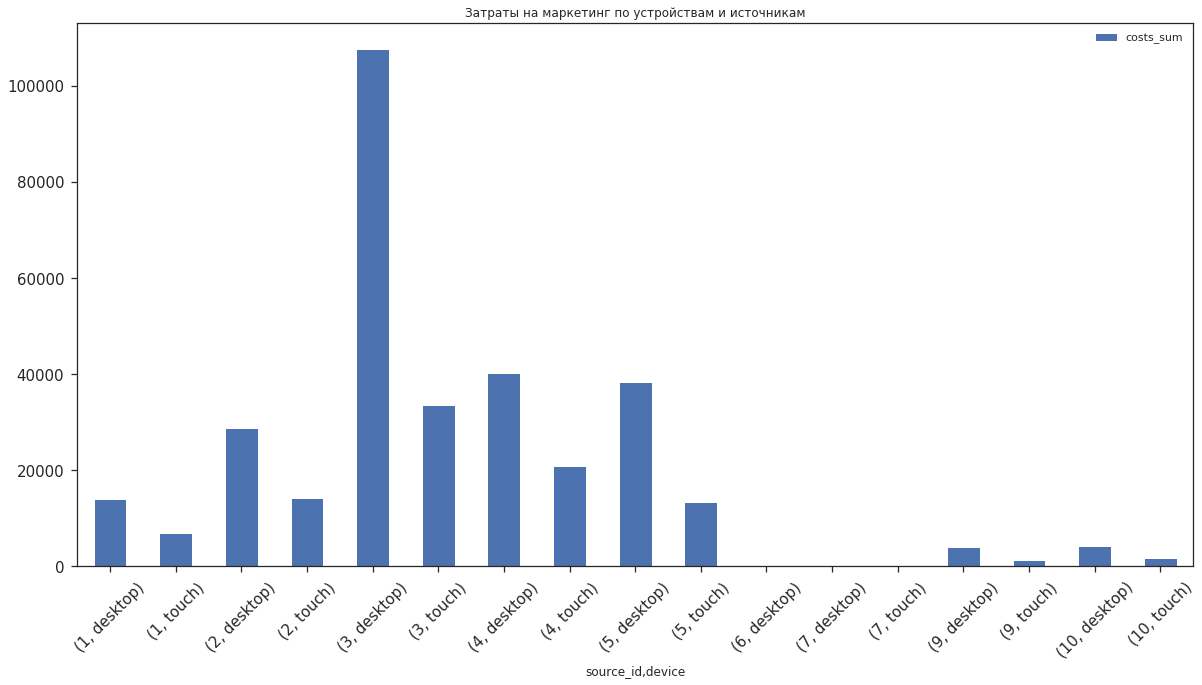

In [110]:
costs_grouped_source_device = (df_all
                             .groupby(['source_id', 'device'])
                             .agg({'cac':'sum'})
                             .rename(columns={'cac':'costs_sum'})
                            )

ax=costs_grouped_source_device.plot(kind='bar',figsize=(20, 10), fontsize=15, rot=45)
ax.set(title='Затраты на маркетинг по устройствам и источникам');

In [111]:
costs_grouped_source_device

costs_sum
source_id device                
1         desktop   13997.020648
          touch      6836.249352
2         desktop   28666.394554
          touch     14139.645446
3         desktop  107760.429566
          touch     33561.200434
4         desktop   40289.963306
          touch     20783.636694
5         desktop   38313.628848
          touch     13442.771152
6         desktop       0.000000
7         desktop       0.000000
          touch         0.000000
9         desktop    4066.003595
          touch      1378.796405
10        desktop    4144.262389
          touch      1676.857611

#### 4.2 Стоимость привлечения 1-го покупателя
<a id='costs_per_buyer'></a>

In [112]:
visits_new.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,9,2017,60
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,5,1,2018,3360


In [113]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [114]:
# Для нахождения затрат на привлечение 1-го покупателя нужно "связать" затраты (из costs),
# количестов покупок из (orders), напрямую они не связаны, поэтому нужно связать через visits

# считаем сумму затрат по источникам
costs_final = costs.groupby('source_id').agg({'costs':'sum'})
# Находим время первого визита
visits_final_temp = visits_new.groupby('uid').agg({'start_ts':'min'})
visits_final_temp = visits_final_temp.rename(columns={'start_ts':'visits_first'})
visits_final_temp = visits_final_temp.reset_index()
# Объединяем визиты с исходной таблицей visits_new и фильтруем, оставляя только первые визиты
visits_final_temp = visits_final_temp.merge(visits_new, on='uid').query('visits_first==start_ts')
# Объединяем orders и visits_final_temp
visits_final = orders.merge(visits_final_temp, on='uid', how='inner')

In [115]:
visits_final.head()

,buy_ts,revenue,uid,visits_first,device,end_ts,source_id,start_ts,session_date,session_week,session_month,session_year,session_duration
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,22,6,2017,120
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,22,6,2017,660
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,22,6,2017,540
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,22,6,2017,1140
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,22,6,2017,1680


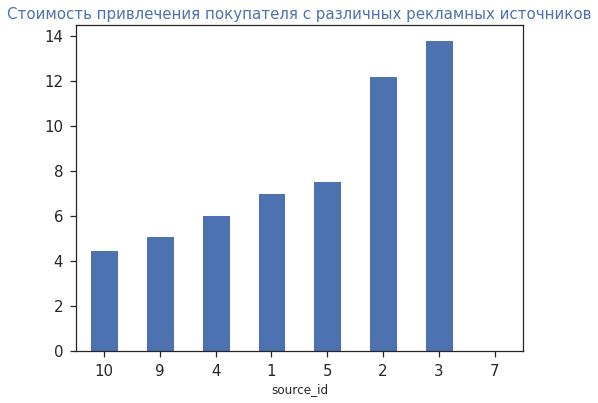

In [116]:
cac_per_purchaser = (visits_final
                     .groupby('source_id')
                     .agg({'uid':'nunique'})
                    ).rename(columns={'uid':'purchasers'})
df_cac_per_purchaser = cac_per_purchaser.join(costs_final)
# PAC (purchaser acquisition cost)
df_cac_per_purchaser['pac'] = df_cac_per_purchaser['costs'] / df_cac_per_purchaser['purchasers']


(df_cac_per_purchaser['pac']
 .sort_values()
 .plot(kind='bar',figsize=(8, 6), fontsize=15, rot=0)
)

plt.title('Стоимость привлечения покупателя с различных рекламных источников', fontsize=15, color='b')
plt.show()


**Вывод**
* больше всего потратили на рекламный источник № 3, посмотрим окупился ли он.
* больше всего на маркетинг тратили в конце 2017 года, в декабре наблюдался максимум затрат

#### 4.3 Расчет ROI (return of investments)
<a id='return_of_investments'></a>

* **ROI = ((прибыль-инвестиции)/инвестиции)*100**
  * прибыль - revenue_total
  * инвестиции(затраты) - costs_sum

In [117]:
costs_grouped_source_device.head()

costs_sum
source_id device                
1         desktop   13997.020648
          touch      6836.249352
2         desktop   28666.394554
          touch     14139.645446
3         desktop  107760.429566

In [118]:
roi_device_source = (visits_final
                     .groupby(['source_id', 'device'])
                     .agg({'revenue':'sum'})
                     .rename(columns={'revenue':'revenue_total'})
)
roi_device_source.head()

revenue_total
source_id device                
1         desktop       25430.76
          touch          5098.47
2         desktop       40629.44
          touch          6613.15
3         desktop       44940.77

**ROI по рекламным источникам и устройствам**

In [119]:
df_roi = costs_grouped_source_device.join(roi_device_source)

df_roi['roi'] = (((df_roi['revenue_total']-df_roi['costs_sum'])/df_roi['costs_sum'])*100).round(2)

df_roi


costs_sum  revenue_total    roi
source_id device                                      
1         desktop   13997.020648       25430.76  81.69
          touch      6836.249352        5098.47 -25.42
2         desktop   28666.394554       40629.44  41.73
          touch     14139.645446        6613.15 -53.23
3         desktop  107760.429566       44940.77 -58.30
          touch     33561.200434        8115.67 -75.82
4         desktop   40289.963306       42438.27   5.33
          touch     20783.636694       13160.19 -36.68
5         desktop   38313.628848       47715.72  24.54
          touch     13442.771152        5636.51 -58.07
6         desktop       0.000000            NaN    NaN
7         desktop       0.000000           1.22    inf
          touch         0.000000            NaN    NaN
9         desktop    4066.003595        4858.90  19.50
          touch      1378.796405         887.95 -35.60
10        desktop    4144.262389        3805.70  -8.17
          touch      1676.857611         839.03 -49.96

**ROI суммарный по источникам**

In [120]:
df_roi_all = (df_roi
                         .reset_index()
                         .groupby('source_id')
                         .agg({'costs_sum':'sum', 'revenue_total':'sum'}))

df_roi_all['roi_all'] = \
(((df_roi_all['revenue_total']-df_roi_all['costs_sum'])/\
 df_roi_all['costs_sum'])*100).round(2)


df_roi_all

,costs_sum,revenue_total,roi_all
source_id,,,
1,20833.27,30529.23,46.54
2,42806.04,47242.59,10.36
3,141321.63,53056.44,-62.46
4,61073.60,55598.46,-8.96
5,51756.40,53352.23,3.08
6,0.00,0.00,NaN
7,0.00,1.22,inf
9,5444.80,5746.85,5.55
10,5821.12,4644.73,-20.21


### 5. Выводы
<a id='conclusions'></a>

Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?

----------
##### Результаты

* Окупились 1,2,5,9 рекламные источники
   * 1-й источник лучше всех остальных общий ROI = 40.41 %
 * Привлечение пользователей с десктопа дороже, но и платят они больше
   * В разрезе ROI по источникам и платформам десктоп окупился практически во всех случаях
 * Низкий Retention Rate
 * Самые большие затраты на маркетинг в декабре, но и средний чек соответствующий
 * Чаще всего от момента появления на сайте до первой покупки проходит 1 минута, и как правило, совершается одна покупка
--------------
##### Основные метрики 
* ROI
* Retention Rate
* LTV
* CAC 
-------------
##### Рекомендации
* Поработать над возвратом пользователей
  * например рассылка со скидками тем кто уже покупал
* Снизить затраты на рекламу для мобильной версии
  * проверить почему так мало покупают с touch устройств (возможно проблемы с отображением мобильной версии)
* увеличить вложения в 1-й и 2-ой источник трафика для десктопов -- оценить результат
* Планировать и начинать проводить рекламную кампанию за 2-4 недели до начала "жаркой поры и высокой цены клика" (в середине августа, начале сентября)

[Вернуться к началу](#return_to_the_top)